<h1>1. Business Problem </h1>
<h2> 1.1 Problem Description </h2>
<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better.
</p>
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>
<h2> 1.2 Problem Statement </h2>
<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>
<h2> 1.3 Sources </h2>
<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
</ul>
<h2>1.4 Real world/Business Objectives and constraints  </h2>
Objectives:<br>
1. Predict the rating that a user would give to a movie that he ahs not yet rated.<br>
2. Minimize the difference between predicted and actual rating (RMSE and MAPE)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>
<h2>2.1 Data </h2>
<h3> 2.1.1 Data Overview </h3>
<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>
<h3> 2.1.2 Example Data point </h3>
<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>
<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>
<h3> 2.2.1 Type of Machine Learning Problem </h3>
<pre>
For a given movie and user we need to predict the rating would be given by him/her to the movie. 
The given problem is a Recommendation problem 
It can also seen as a Regression problem 
</pre>
<h3> 2.2.2 Performance metric </h3>
<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>
<h3> 2.2.3 Machine Learning Objective and Constraints </h3>
1. Minimize RMSE.<br>
2. Try to provide some interpretability.<br>



In [0]:
# Download Dataset from Kaggle
!kaggle datasets download -d netflix-inc/netflix-prize-data

100% 681M/683M [00:17<00:00, 49.0MB/s]
100% 683M/683M [00:17<00:00, 41.6MB/s]


In [0]:
# Show the content of files
ls /content

drive/                  test.csv                train_sparse_matrix.npz
netflix-prize-data.zip  test_sparse_matrix.npz
sample_data/            train.csv


In [0]:
!unzip /content/netflix-prize-data.zip

Archive:  /content/netflix-prize-data.zip
  inflating: README                  
  inflating: combined_data_1.txt     
  inflating: combined_data_2.txt     
  inflating: combined_data_3.txt     
  inflating: combined_data_4.txt     
  inflating: movie_titles.csv        
  inflating: probe.txt               
  inflating: qualifying.txt          


In [1]:
# Import necessary libraries

# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import xgboost

import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Start mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<h1> 3. Exploratory Data Analysis </h1>
<h2> 3.1 Preprocessing</h2> 
<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [0]:
start = datetime.now()
if not os.path.isfile('data.csv'):
    # Create a file 'data.csv' before reading it
    # Read all the files in netflix and store them in one big file('data.csv')
    # We re reading from each of the four files and appendig each rating to a global file 'train.csv'
    data = open('/content/data.csv', mode='w')
    
    row = list()
    # List of files that want to combine together
    files=['/content/combined_data_1.txt','/content/combined_data_2.txt', 
           '/content/combined_data_3.txt', '/content/combined_data_4.txt']
    # Iterate each file
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:] # you don't have to do this.
                line = line.strip() # In order to remove \n (next line)
                if line.endswith(':'):
                    # All below are ratings for this movie, until another movie appears.
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')] # Split into token
                    row.insert(0, movie_id) # Insert first column as movie_id
                    data.write(','.join(row)) # Combine the token and insert into csv file
                    data.write('\n') # Put the end as \n to got next row
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)

Reading ratings from /content/combined_data_1.txt...
Done.

Reading ratings from /content/combined_data_2.txt...
Done.

Reading ratings from /content/combined_data_3.txt...
Done.

Reading ratings from /content/combined_data_4.txt...
Done.

Time taken : 0:02:43.977766


In [0]:
# save data.csv file to my gdrive
!cp '/content/data.csv' '/content/drive/My Drive/NetFlix Prize/'

In [0]:
print("Creating the dataframe from data.csv file..")
df = pd.read_csv('/content/data.csv', sep=',', names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

# we are arranging the ratings according to time.
print('Sorting the dataframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

Creating the dataframe from data.csv file..
Done.

Sorting the dataframe by date..
Done..


In [0]:
# Print top value to see the variable
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [0]:
# describe about rating
df.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<h3>3.1.2 Checking for NaN values</h3>

In [0]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  0


<h3>3.1.3 Removing Duplicates </h3>

In [0]:
dup_bool = df.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


 <h3>3.1.4 Basic Statistics (#Ratings, #Users, and #Movies)</h3>

In [0]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df.shape[0])
print("Total No of Users   :", len(np.unique(df.user)))
print("Total No of movies  :", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings : 100480507
Total No of Users   : 480189
Total No of movies  : 17770


<h2>3.2 Spliting data into Train and Test(80:20) </h2>

In [0]:
if not os.path.isfile('/content/train.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[:int(df.shape[0]*0.80)].to_csv("/content/train.csv", index=False)

if not os.path.isfile('/content/test.csv'):
    # create the dataframe and store it in the disk for offline purposes..
    df.iloc[int(df.shape[0]*0.80):].to_csv("/content/test.csv", index=False)

In [0]:
# Save train.csv and test.csv to my gdrive ( to save my RAM)
!cp '/content/train.csv' '/content/drive/My Drive/NetFlix Prize/'
!cp '/content/test.csv' '/content/drive/My Drive/NetFlix Prize/'

cp: cannot stat '/content/train.csv': No such file or directory
cp: cannot stat '/content/test.csv': No such file or directory


<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies)</h3>

In [0]:
# Checkpoint to Release store and reconnect colab
# import train.csv and test.csv file from my gdrive
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/NetFlix Prize/train.csv' '/content/' 
!cp '/content/drive/My Drive/NetFlix Prize/test.csv' '/content/' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_df = pd.read_csv("/content/train.csv", parse_dates=['date'])
test_df = pd.read_csv("/content/test.csv")

In [0]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

In [0]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>

In [0]:
# method to make y-axis more readable
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

<h3> 3.3.1 Distribution of ratings </h3>

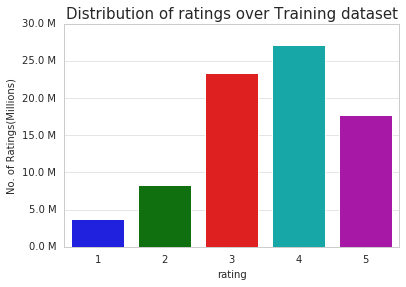

In [0]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(train_df.rating)
ax.set_yticklabels([human(item) for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show();

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

In [0]:
# It is used to skip the warning ''SettingWithCopyWarning''.. 
pd.options.mode.chained_assignment = None  # default='warn'

# Get the day based on the datetime stamp
train_df['day_of_week'] = train_df.date.dt.weekday_name

train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


<h3> 3.3.2 Number of Ratings per a month </h3>

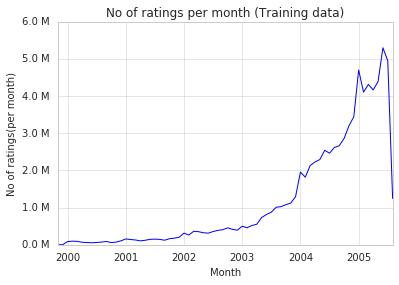

In [0]:
ax = train_df.resample('M', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item) for item in ax.get_yticks()])
plt.show()

<h3> 3.3.3 Analysis on the Ratings given by user </h3>

In [0]:
no_of_rated_movies_per_user = train_df.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64

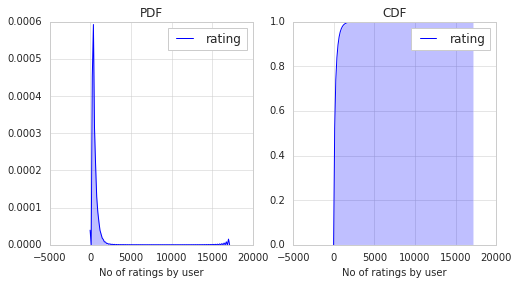

In [0]:
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

In [0]:
no_of_rated_movies_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

> _There,  is something interesting going on with the quantiles.._

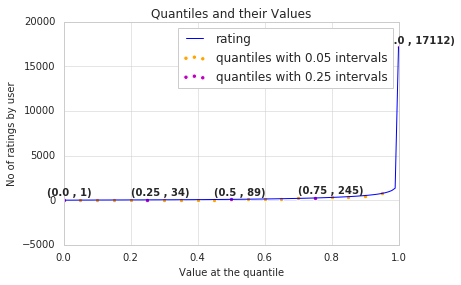

In [0]:
# percentile from 0 to 1 with interval 0.01
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')
    
plt.show()

In [0]:
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

__how many ratings at the last 5% of all ratings__??

In [0]:
print('\n No of ratings at last 5 percentile : {}\n'.format(sum(no_of_rated_movies_per_user >= 749)))


 No of ratings at last 5 percentile : 20305



<h3> 3.3.4 Analysis of ratings of a movie given by a user </h3>

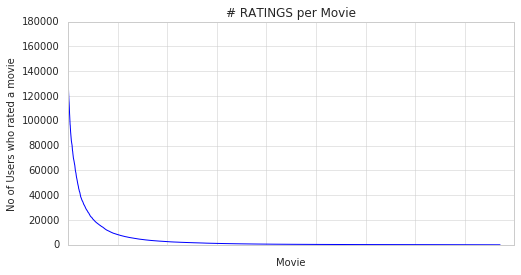

In [0]:
no_of_ratings_per_movie = train_df.groupby(by='movie')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of Users who rated a movie')
ax.set_xticklabels([])

plt.show()

- __It is very skewed.. just like nunmber of ratings given per user.__
    
    
    - There are some movies (which are very popular) which are rated by huge number of users.
    
    - But most of the movies(like 90%) got some hundereds of ratings.

<h3> 3.3.5 Number of ratings on each day of the week</h3>

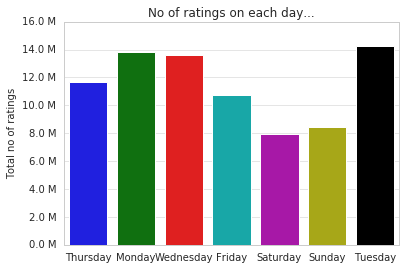

In [0]:
fig, ax = plt.subplots()
sns.countplot(x='day_of_week', data=train_df, ax=ax)
plt.title('No of ratings on each day...')
plt.ylabel('Total no of ratings')
plt.xlabel('')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

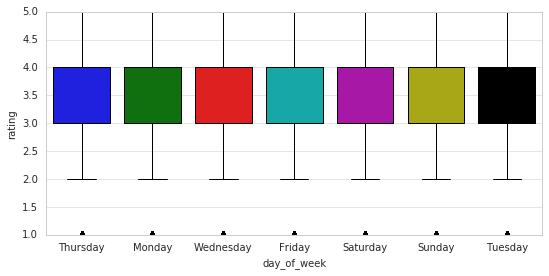

0:00:27.797047


In [0]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [0]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




<h3> 3.3.6 Creating sparse matrix from data frame </h3>
<h4> 3.3.6.1 Creating sparse matrix from train data frame </h4>

In [0]:
# Checkpoint
# import train.csv and test.csv file from my gdrive
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/NetFlix Prize/train_sparse_matrix.npz' '/content/' 
!cp '/content/drive/My Drive/NetFlix Prize/test_sparse_matrix.npz' '/content/' 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
start = datetime.now()
if os.path.isfile('/content/train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('/content/train_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.user.values,
                                               train_df.movie.values)),)
    
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("/content/train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')

print(datetime.now() - start)

We are creating sparse_matrix from the dataframe..
Done. It's shape is : (user, movie) :  (2649430, 17771)
Saving it into disk for furthur usage..
Done..

0:01:06.230509


<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [0]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()

# Sparsity 0f matrix = # number of zeroes/total number of elements
print("Sparsity Of Train matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Train matrix : 99.8292709259195 % 


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [0]:
start = datetime.now()
if os.path.isfile('/content/test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:01.227779


<p><b>The Sparsity of Test data Matrix</b></p>

In [0]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

# Sparsity 0f matrix = # number of zeroes/total number of elements
print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


<h3>3.3.7 Finding
<ul>
  <li> Global average of all movie ratings </li>
  <li>Average rating per user </li> 
  <li>Average rating per movie </li>
</h3>

In [0]:
# get the user averages in dictionary (key: user_id/movie_id, value: avg rating)

def get_average_ratings(sparse_matrix, of_users):
    
    # average ratings of user/axes
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes

    # ".A1" is for converting Column_Matrix to 1-D numpy array
    # axis = 0 means summing in columnwise, axis = 1 means summing in rowise
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    # Boolean matrix of ratings ( whether a user rated that movie or not)
    is_rated = sparse_matrix!=0
    # no of ratings that each user OR movie..
    no_of_ratings = is_rated.sum(axis=ax).A1
    
    # max_user  and max_movie ids in sparse matrix 
    u,m = sparse_matrix.shape
    # creae a dictonary of users and their average ratigns..
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

    # return that dictionary of average ratings
    return average_ratings

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [0]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> 3.3.7.2 finding average rating per user</h4>

In [0]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.3781094527363185


<h4> 3.3.7.3 finding average rating per movie</h4>

In [0]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])


 AVerage rating of movie 15 : 3.3038461538461537


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

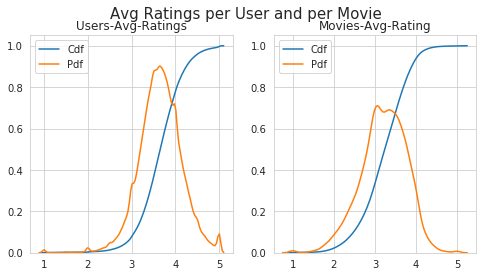

0:00:35.394996


In [0]:
start = datetime.now()
# draw pdfs for average rating per user and average
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))
fig.suptitle('Avg Ratings per User and per Movie', fontsize=15)

ax1.set_title('Users-Avg-Ratings')
# get the list of average user ratings from the averages dictionary..
user_averages = [rat for rat in train_averages['user'].values()]
sns.distplot(user_averages, ax=ax1, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(user_averages, ax=ax1, hist=False,label='Pdf')

ax2.set_title('Movies-Avg-Rating')
# get the list of movie_average_ratings from the dictionary..
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.distplot(movie_averages, ax=ax2, hist=False, 
             kde_kws=dict(cumulative=True), label='Cdf')
sns.distplot(movie_averages, ax=ax2, hist=False, label='Pdf')

plt.show()
print(datetime.now() - start)

<h3> 3.3.8 Cold Start problem </h3>
<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [0]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,
                                                                        np.round((new_users/total_users)*100, 2)))


Total number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 75148(15.65 %) 
 


> We might have to handle __new users__ ( ___75148___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [0]:
total_movies = len(np.unique(df.movie))
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Users in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,
                                                                        np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 17770

Number of Users in Train data : 17424

No of Movies that didn't appear in train data: 346(1.95 %) 
 


In [0]:
# save train and test sparse matrix file to my gdrive
!cp '/content/train_sparse_matrix.npz' '/content/drive/My Drive/NetFlix Prize/'
!cp '/content/test_sparse_matrix.npz' '/content/drive/My Drive/NetFlix Prize/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
cp: cannot stat '/content/train_sparse_matrix.npz': No such file or directory
cp: cannot stat '/content/test_sparse_matrix.npz': No such file or directory


> We might have to handle __346 movies__ (small comparatively) in test data

<h2> 3.4 Computing Similarity matrices </h2>
<h3> 3.4.1 Computing User-User Similarity matrix </h3>
1. Calculating User User Similarity_Matrix is <strong>not very easy</strong> (<strong>unless you have huge Computing Power and lots of time</strong>) because of number of. usersbeing lare.

    You can try if you want to. Your system could crash or the program stops with "Memory Error"


In [0]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20, draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top ",top," similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data
    
    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken

Computing top  100  similarities for each user..
computing done for 20 users [  time elapsed : 0:01:14.181596  ]
computing done for 40 users [  time elapsed : 0:02:28.499947  ]
computing done for 60 users [  time elapsed : 0:03:40.895740  ]
computing done for 80 users [  time elapsed : 0:04:53.345757  ]
computing done for 100 users [  time elapsed : 0:06:06.578803  ]
Creating Sparse matrix from the computed similarities


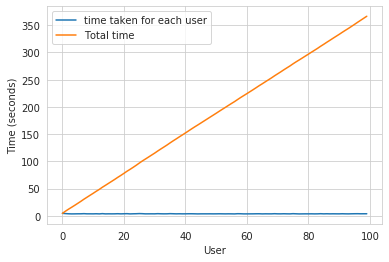

----------------------------------------------------------------------------------------------------
Time taken : 0:06:18.210750


In [0]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100, verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

<h4> 3.4.1.2 Trying with reduced dimensions (Using TruncatedSVD for dimensionality reduction of user vector)</h4>

* We have  **405,041 users** in out training set and computing similarities between them..( **17K dimensional vector..**) is time consuming..


- From above plot, It took roughly __3.66 sec__ for computing simlilar users for __one user__
    
    
- We have __405,041 users__ with us in training set.


- ${ 405041 \times 3.66 = 1482450.03  \sec } =  24707.501 \min = 411.792 \text{ hours}
= 17.15 \text{ days}...$

    - Even if we run on 4 cores parallelly (a typical system now a days), It will still take almost __10 and 1/2__ days.
    
 IDEA:  Instead, we will try to reduce the dimentsions using SVD, so that __it might__ speed up the process...

In [0]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

start = datetime.now()

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

print(datetime.now()-start)

Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [0]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Facors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100, 200, 300, 400, 500]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,  np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)



ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)

plt.show()

In [0]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

 
> I think 500 dimensions is good enough 

---------

-  By just taking __(20 to 30)__ latent factors, explained variance that we could get is __20 %__. 

- To take it to __60%__, we have to take  __almost 400 latent factors__. It is not fare.



- It basically is the __gain of variance explained__, if we ___add one additional latent factor to it.___


- By adding one by one latent factore too it, the ___gain in expained variance__ with that addition is decreasing. (Obviously, because they are sorted that way).
- ___LHS Graph___:
    - __x__ --- ( No of latent factos ),
    - __y__ --- ( The variance explained by taking x latent factors)



- __More decrease in the line (RHS graph) __:
    - We  are getting more expained variance than before.
- __Less decrease in that line (RHS graph)__  :
    - We are not getting benifitted from adding latent factor furthur. This is what is shown in the plots.


- ___RHS Graph___:
    - __x__ --- ( No of latent factors ),
    - __y__ --- ( Gain n Expl_Var by taking one additional latent factor) 

In [0]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

In [0]:
type(trunc_matrix), trunc_matrix.shape

* Let's convert this to actual sparse matrix and store it for future purposes

In [0]:
!cp '/content/drive/My Drive/NetFlix Prize/trunc_sparse_matrix.npz' '/content/' 

In [0]:
if not os.path.isfile('/content/trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('/content/trunc_sparse_matrix.npz')

Computing top  50  similarities for each user..
computing done for 10 users [  time elapsed : 0:01:18.078198  ]
computing done for 20 users [  time elapsed : 0:02:36.124078  ]
computing done for 30 users [  time elapsed : 0:03:54.823247  ]
computing done for 40 users [  time elapsed : 0:05:12.907758  ]
computing done for 50 users [  time elapsed : 0:06:30.173070  ]
Creating Sparse matrix from the computed similarities


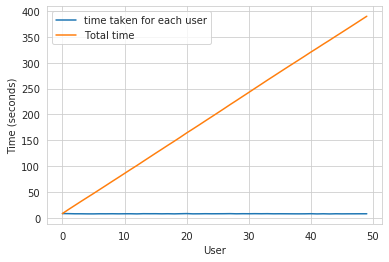

--------------------------------------------------
time: 0:06:58.668976


In [0]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

**This is taking more time for each user than Original one.**

- from above plot, It took almost __3.9secs__ for computing simlilar users for __one user__
    
    
- We have __405041 users__ with us in training set.


- ${ 405041 \times 3.9 ==== 1579659.9 \sec } ====   26327.665\min ==== 438.794 \text{ hours}
==== 18.3 \text{ days}...$

    - Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.

- __Why did this happen...??__


    - Just think about it. It's not that difficult.

---------------------------------_( sparse & dense..................get it ?? )_-----------------------------------

__Is there any other way to compute user user similarity..??__

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)

    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

<h3> 3.4.2 Computing Movie-Movie Similarity matrix </h3>

In [0]:
start = datetime.now()
if not os.path.isfile('/content/m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("/content/m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("/content/m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")

print(datetime.now() - start)

It seems you don't have that file. Computing movie_movie similarity...
Done..
Saving it to disk without the need of re-computing it again.. 
Done..
It's a  (17771, 17771)  dimensional matrix
0:09:46.037396


In [0]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [0]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [0]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

0:00:32.087565


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706])

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [0]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'
!cp '/content/drive/My Drive/NetFlix Prize/movie_titles.csv' '/content/'

movie_titles = pd.read_csv("/content/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head()

Tokenization took: 2.84 ms
Type conversion took: 10.29 ms
Parser memory cleanup took: 0.01 ms


,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


<p style='font-size:15px'><b>Similar Movies for 'Vampire Journals'</b></p>

In [0]:
mv_id = 67

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similar to this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Vampire Journals

It has 270 Ratings from users.

We have 17284 movies which are similar to this  and we will get only top most..


In [0]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

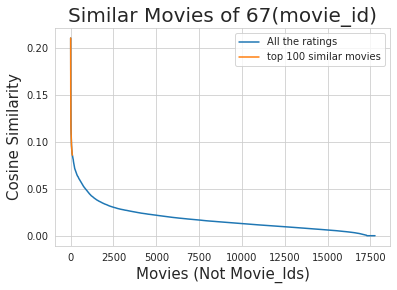

In [0]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

__Top 10 similar movies__

In [0]:
movie_titles.loc[sim_indices[:10]]


,year_of_release,title
movie_id,,
323,1999.0,Modern Vampires
4044,1998.0,Subspecies 4: Bloodstorm
1688,1993.0,To Sleep With a Vampire
13962,2001.0,Dracula: The Dark Prince
12053,1993.0,Dracula Rising
16279,2002.0,Vampires: Los Muertos
4667,1996.0,Vampirella
1900,1997.0,Club Vampire
13873,2001.0,The Breed


 > Similarly, we can ___find similar users___ and compare how similar they are.

<h1> <strong>Assignment</strong> </h1>

1.Instead of using 10K users and 1K movies to train the above models, use 25K users and 3K movies (or more) to train all of the above models. Report the RMSE and MAPE on the test data using larger amount of data and provide a comparison between various models as shown above.

>NOTE: Please be patient as some of the code snippets make take many hours to compelete execution.

2.Tune hyperparamters of all the Xgboost models above to improve the RMSE.

 <h1> 4.  Machine Learning Models </h1>

In [0]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    """
        It will get it from the ''path'' if it is present  or It will create 
        and store the sampled sparse matrix in the path specified.
    """

    # get (row, col) and (rating) tuple from sparse_matrix...
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    # It just to make sure to get same sample everytime we run this program..
    # and pick without replacement....
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    # get the boolean mask or these sampled_items in originl row/col_inds..
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done..\n')
    
    return sample_sparse_matrix

In [0]:
train_sparse_matrix.shape, test_sparse_matrix.shape

((2649430, 17771), (2649430, 17771))

<h2> 4.1 Sampling Data </h2>
<h3>4.1.1 Build sample train data from the train data</h3>

In [0]:
start = datetime.now()
path = "/content/sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=25000, no_movies=3000,
                                             path = path)

print(datetime.now() - start)

Original Matrix : (users, movies) -- (405041 17424)
Original Matrix : Ratings -- 80384405

Sampled Matrix : (users, movies) -- (400000 10000)
Sampled Matrix : Ratings -- 45018569
Saving it into disk for furthur usage..
Done..

0:02:03.449951


<h3>4.1.2 Build sample test data from the test data</h3>

In [0]:
start = datetime.now()

path = "/content/sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=25000, no_movies=3000,
                                                 path = path)
print(datetime.now() - start)

<h2>4.2 Finding 
<ul><li>Global Average of all movie ratings</li> <li>Average rating per User</li> <li>Average rating per Movie (from sampled train)</li></ul></h2>

In [0]:
sample_train_averages = dict()

<h3>4.2.1 Finding Global Average of all movie ratings</h3>

In [0]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

<h3>4.2.2 Finding Average rating per User</h3>

In [0]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])

<h3>4.2.3 Finding Average rating per Movie</h3>

In [0]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])

<h2> 4.3 Featurizing data </h2>

In [0]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))

<h3> 4.3.1 Featurizing data for regression problem </h3>
<h4> 4.3.1.1 Featurizing train data </h4>

In [0]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [0]:
############################################################
# It took me almost 10 hours to prepare this train dataset.#
############################################################
start = datetime.now()
if os.path.isfile('/content/reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('/content/reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

In [31]:
# Running from my local system: Creating_Reg.ipynb
# You can check it out. It tooks 3 days to compute 25k rows(user) and 3k columns(movie) and save it as reg_train.csv for train
reg_train = pd.read_csv('reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3
2,555770,10,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4
3,767518,10,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5
4,894393,10,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 similar users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 similar movies rated by this movie.. )


- __UAvg__ : User's Average rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h4> 4.3.1.2 Featurizing test data </h4>

In [0]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [0]:
start = datetime.now()

if os.path.isfile('/content/reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('/content/reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

In [32]:
# Running from my local system: Creating_Reg.ipynb
# You can check it out. It tooks 1 days to compute 25k rows(user) and 3k columns(movie) and save it as reg_test.csv for test
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4
2,368977,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,5
3,508584,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h3> 4.3.2 Transforming data for Surprise models</h3>

In [2]:
!pip install surprise
from surprise import Reader, Dataset

  Stored in directory: C:\Users\sahil\AppData\Local\pip\Cache\wheels\cc\fa\8c\16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<h4> 4.3.2.1 Transforming train data </h4>

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

In [6]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

<h4> 4.3.2.2 Transforming test data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [7]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(1129620, 2, 3), (3321, 5, 4), (368977, 5, 5)]

<h2> 4.4 Applying Machine Learning models </h2>

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [8]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [9]:
# To get RMSE and MAPE
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

def mape_fn(y_true, y_pred):
    return np.mean(np.abs( (y_true - y_pred)/y_true )) * 100

def plot_grid_hyper(gridclf, loss_name):
    max_depth_list = list(gridclf.cv_results_['param_max_depth'].data)
    samplesplit_list = list(gridclf.cv_results_['param_n_estimators'].data)
    plt.figure(1)
    plt.subplot(211)
    data = pd.DataFrame(data={'Max Depth':max_depth_list, 'N Estimators':samplesplit_list , 'Scr':gridclf.cv_results_['mean_train_{}'.format(loss_name[0])]})
    data = data.pivot(index='Max Depth', columns='N Estimators', values='Scr')
    sns.heatmap(data, annot=True).set_title('{} for Training data'.format(loss_name[0]))
    plt.subplot(212)
    data = pd.DataFrame(data={'Max Depth':max_depth_list, 'N Estimators':samplesplit_list , 'Scr':gridclf.cv_results_['mean_test_{}'.format(loss_name[0])]})
    data = data.pivot(index='Max Depth', columns='N Estimators', values='Scr')
    sns.heatmap(data, annot=True).set_title('{} for CV data'.format(loss_name[0]))
    plt.tight_layout()
    plt.figure(2)
    plt.subplot(211)
    data = pd.DataFrame(data={'Max Depth':max_depth_list, 'N Estimators':samplesplit_list , 'Scr':gridclf.cv_results_['mean_train_{}'.format(loss_name[1])]})
    data = data.pivot(index='Max Depth', columns='N Estimators', values='Scr')
    sns.heatmap(data, annot=True).set_title('{} for Training data'.format(loss_name[1]))
    plt.subplot(212)
    data = pd.DataFrame(data={'Max Depth':max_depth_list, 'N Estimators':samplesplit_list , 'Scr':gridclf.cv_results_['mean_test_{}'.format(loss_name[1])]})
    data = data.pivot(index='Max Depth', columns='N Estimators', values='Scr')
    sns.heatmap(data, annot=True).set_title('{} for CV data'.format(loss_name[1]))
    plt.tight_layout()
    plt.show()

# Define xgboost model for hyperparameter and plot the hypermaters vs loss fn
def hype_xgboost(xtrain, ytrain, parameters_, scoring_fn, loss_name):
    print('Instance create XGBClassifier')
    clf = xgboost.XGBRegressor(random_state=1, silent=True)
    print('Fitting GridSearchCV')
    grid_clf = GridSearchCV(clf, parameters_, cv=3, verbose=3, scoring=scoring_fn, return_train_score=True, refit=False)
    grid_clf.fit(xtrain,ytrain)
    plot_grid_hyper(grid_clf, loss_name)

def train_xgboost(n_est, max_dep, xtrain, ytrain, xtest, ytest, verbose=True):
    train_results = dict()
    test_results = dict()
    clf = xgboost.XGBRegressor(n_estimators=n_est, max_depth=max_dep, random_state=1)
    clf.fit(xtrain, ytrain)
    y_train_pred = clf.predict(xtrain)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(ytrain.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = clf.predict(xtest) 
    rmse_test, mape_test = get_error_metrics(y_true=ytest.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return clf, train_results, test_results

In [33]:
# prepare Train data and Test data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

<h3> 4.4.1 XGBoost with initial 13 features </h3>

Instance create XGBClassifier
Fitting GridSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.903, test=-65.866), RMSE=(train=-2.708, test=-2.709), total=   2.8s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.898, test=-65.673), RMSE=(train=-2.708, test=-2.705), total=   1.3s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.749, test=-65.923), RMSE=(train=-2.706, test=-2.705), total=   1.4s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.662, test=-59.647), RMSE=(train=-2.471, test=-2.472), total=   1.6s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.685, test=-59.462), RMSE=(train=-2.471, test=-2.468), total=   1.7s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.570, test=-59.674), RMSE=(train=-2.470, test=-2.468), total=   1.7s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49.595, test=-49.583), RMSE=(train=-2.073, test=-2.075), total=   2.2s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49

[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.632, test=-66.290), RMSE=(train=-2.698, test=-2.701), total=   4.6s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.607, test=-66.263), RMSE=(train=-2.698, test=-2.701), total=   4.6s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.543, test=-66.538), RMSE=(train=-2.695, test=-2.705), total=   4.7s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.913, test=-59.869), RMSE=(train=-2.455, test=-2.464), total=   6.6s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.895, test=-59.791), RMSE=(train=-2.455, test=-2.462), total=   6.7s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(tra

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.3min finished


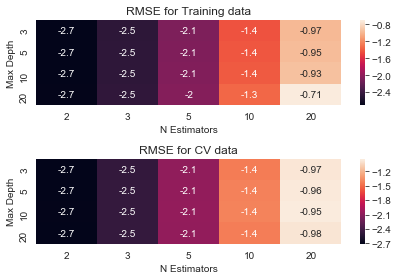

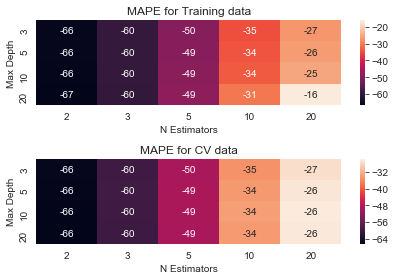

In [11]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html

parameter = {'n_estimators':[2, 3, 5, 10, 20], 'max_depth':[3, 5, 10, 20]}
mape_loss = make_scorer(mape_fn, greater_is_better=False)
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAPE': mape_loss}
hype_xgboost(x_train,y_train,parameter,scoring,['RMSE','MAPE'])

[13:40:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.2545561013662423
MAPE :  31.85414734994786


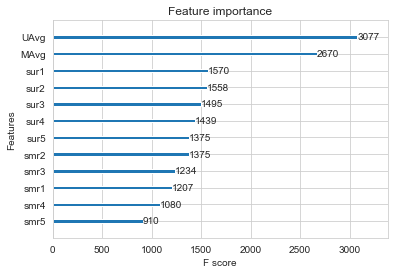

In [12]:
# With best rmse: n_estimator=20, max_depth=10
# With best mape, n_estimator=20, max_depth=20

first_xgb, train_results, test_results = train_xgboost(n_est=20, max_dep=10, xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgboost.plot_importance(first_xgb)
plt.show()

<h3> 4.4.2 Suprise BaselineModel </h3>

__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 


__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

In [13]:
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV as surprise_GridCV

In [14]:
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100    

def hyper_surprise(algo, params_, train_data, trainset, testset, verbose=True): 
    start = datetime.now()
    train = dict()
    test = dict()
    
    # https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv
    
    print('GridSearchcv and Refit best params the model...')
    grid_clf = surprise_GridCV(algo, params_, measures=['rmse'], cv=3, return_train_measures=True, refit=True)
    grid_clf.fit(train_data)
        
    # # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = grid_clf.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    # #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    # #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = grid_clf.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # # return two dictionaries train and test
    return train, test

In [15]:
# options are to specify.., how to compute those user and item biases
# https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baseline-estimates-configuration

# params = {'bsl_options': {'method': 'sgd', 'learning_rate': [.005, .001, .05, .01, .5, 1], 'n_epochs': [5,10,15], 'reg': [5,10,15]}}
param_grid = {'bsl_options': {'method': ['sgd'],
                              'learning_rate': [.005, .001, .05, .01, .5, 1],
                              'n_epochs': [5,10,15],
                              'reg': [5,10,15]}}

bsl_train_results, bsl_test_results = hyper_surprise(BaselineOnly, param_grid, train_data, trainset, testset)

# # Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

GridSearchcv and Refit best params the model...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases usin

<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [34]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5,3.631399
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3,3.635639


__Updating Test Data__

In [35]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']
reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.587581
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4,3.587581


Instance create XGBClassifier
Fitting GridSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.864, test=-65.840), RMSE=(train=-2.708, test=-2.709), total=   1.9s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.883, test=-65.694), RMSE=(train=-2.708, test=-2.705), total=   1.7s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.748, test=-65.956), RMSE=(train=-2.706, test=-2.705), total=   1.7s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.690, test=-59.652), RMSE=(train=-2.471, test=-2.472), total=   2.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.660, test=-59.452), RMSE=(train=-2.471, test=-2.468), total=   2.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.572, test=-59.676), RMSE=(train=-2.470, test=-2.468), total=   2.0s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49.613, test=-49.588), RMSE=(train=-2.073, test=-2.075), total=   2.7s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.3min finished


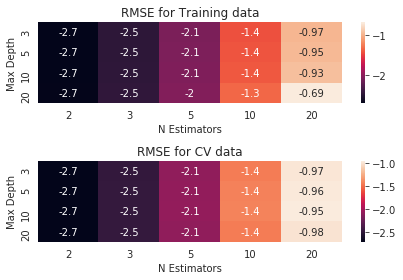

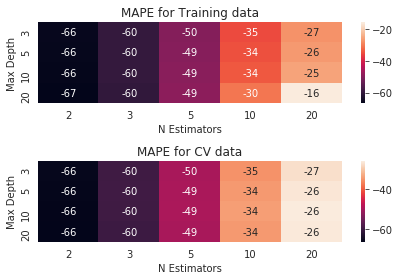

In [20]:
# prepare Train data and Test data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
parameter = {'n_estimators':[2, 3, 5, 10, 20], 'max_depth':[3, 5, 10, 20]}
mape_loss = make_scorer(mape_fn, greater_is_better=False)
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAPE': mape_loss}
hype_xgboost(x_train,y_train,parameter,scoring,['RMSE','MAPE'])

[13:59:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.2545561013662423
MAPE :  31.85414734994786


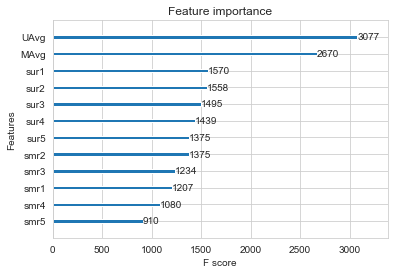

In [16]:
# With best rmse: n_estimator=20, max_depth=10
# With best mape, n_estimator=20, max_depth=20

first_xgb, train_results, test_results = train_xgboost(n_est=20, max_dep=10, xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgboost.plot_importance(first_xgb)
plt.show()

<h3> 4.4.4 Surprise KNNBaseline predictor </h3>

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

 - $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

 - $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

 - _sim (u, v)_ - __Similarity__ between users __u and v__  
- Generally, it will be cosine similarity or Pearson correlation coefficient. <br>
- But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___
       





  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [17]:
from surprise import KNNBaseline

In [18]:
# options are to specify.., how to compute those user and item biases
# https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baseline-estimates-configuration

param_grid = {  'bsl_options': {'method': ['sgd'],
                                'k': [20,40,50]},
               'sim_options': {'user_based' : [True],
               'name': ['pearson_baseline'],
               'shrinkage': [10,25,50,100],
               'min_support': [2,5]
              }}

bsl_train_results, bsl_test_results = hyper_surprise(KNNBaseline, param_grid, train_data, trainset, testset)

GridSearchcv and Refit best params the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biase

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating the model with train data..
time taken : 0:18:09.656449
---------------
Train Data
---------------
RMSE : 0.4536279292470732

MAPE : 12.840252350475915

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:03.488553
---------------
Test Data
---------------
RMSE : 1.0818615549831905

MAPE : 34.03037281417306

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 1 day, 1:02:18.315884


In [19]:
# # Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = bsl_train_results
models_evaluation_test['knn_bsl_u'] = bsl_test_results

In [20]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm
param_grid = {  'bsl_options': {'method': ['sgd'],
                                'k': [20,40,50]},
               'sim_options': {'user_based' : [False],
               'name': ['pearson_baseline'],
               'shrinkage': [10,25,50,100],
               'min_support': [2,5]
              }}

bsl_train_results, bsl_test_results = hyper_surprise(KNNBaseline, param_grid, train_data, trainset, testset)

GridSearchcv and Refit best params the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biase

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating the model with train data..
time taken : 0:01:36.791717
---------------
Train Data
---------------
RMSE : 0.5038994796517224

MAPE : 14.168515366483724

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:02.102379
---------------
Test Data
---------------
RMSE : 1.082024048595736

MAPE : 34.03296423620119

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 1:46:50.282945


In [22]:
models_evaluation_train['knn_bsl_m'] = bsl_train_results
models_evaluation_test['knn_bsl_m'] = bsl_test_results

<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>

- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

__Preparing Train data __

In [36]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,3.882353,3.611111,5,3.631399,4.984495,4.884782
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3,3.635639,3.181296,3.295934


In [37]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3,3.587581,3.587581,3.587581
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,4,3.587581,3.587581,3.587581


Instance create XGBClassifier
Fitting GridSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.903, test=-65.866), RMSE=(train=-2.708, test=-2.709), total=   2.9s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.898, test=-65.673), RMSE=(train=-2.708, test=-2.705), total=   2.0s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.749, test=-65.923), RMSE=(train=-2.706, test=-2.705), total=   2.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.662, test=-59.647), RMSE=(train=-2.471, test=-2.472), total=   2.3s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.685, test=-59.462), RMSE=(train=-2.471, test=-2.468), total=   2.3s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.570, test=-59.674), RMSE=(train=-2.470, test=-2.468), total=   2.3s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49.595, test=-49.583), RMSE=(train=-2.073, test=-2.075), total=   3.2s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49

[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.727, test=-66.319), RMSE=(train=-2.697, test=-2.702), total=   6.7s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.708, test=-66.282), RMSE=(train=-2.697, test=-2.701), total=   7.2s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.641, test=-66.616), RMSE=(train=-2.695, test=-2.707), total=   7.0s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.969, test=-59.912), RMSE=(train=-2.453, test=-2.465), total=  10.1s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.953, test=-59.812), RMSE=(train=-2.454, test=-2.462), total=   9.9s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(tra

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 13.0min finished


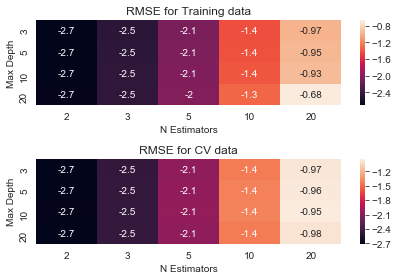

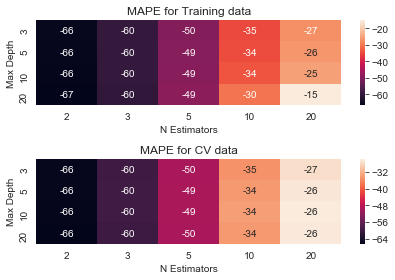

In [38]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# hyperparams the model
parameter = {'n_estimators':[2, 3, 5, 10, 20], 'max_depth':[3, 5, 10, 20]}
mape_loss = make_scorer(mape_fn, greater_is_better=False)
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAPE': mape_loss}
hype_xgboost(x_train,y_train,parameter,scoring,['RMSE','MAPE'])

[18:59:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.2049467453902432
MAPE :  32.281628566644116


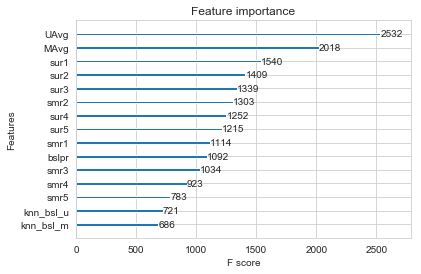

In [39]:
# With best rmse: n_estimator=20, max_depth=10
# With best mape, n_estimator=20, max_depth=20

first_xgb, train_results, test_results = train_xgboost(n_est=20, max_dep=10, xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results

xgboost.plot_importance(first_xgb)
plt.show()

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        

- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf
    
- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [41]:
from surprise import SVD

In [44]:
param_grid = {'biased': [True,False],
              'n_factors': [5,10,100],
              'n_epochs': [5,10,15],
              'reg_all': [0.05,0.02,0.01]}

# http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 
svd_train_results, svd_test_results = hyper_surprise(SVD, param_grid, train_data, trainset, testset)

GridSearchcv and Refit best params the model...
Evaluating the model with train data..
time taken : 0:00:06.372963
---------------
Train Data
---------------
RMSE : 0.8376935882754125

MAPE : 25.325297039062516

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:01.985657
---------------
Test Data
---------------
RMSE : 1.081821397995262

MAPE : 33.99743279532154

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:38:33.321746


In [45]:
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

<h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf
    
- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 
    
- $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 

In [47]:
from surprise import SVDpp

In [49]:
param_grid = {'n_factors': [5,10,100],
              'n_epochs': [5,10,15],
              'reg_all': [0.05,0.02,0.01]}

svdpp_train_results, svdpp_test_results = hyper_surprise(SVDpp, param_grid, train_data, trainset, testset)

GridSearchcv and Refit best params the model...
Evaluating the model with train data..
time taken : 0:01:04.646151
---------------
Train Data
---------------
RMSE : 0.8250386535525809

MAPE : 24.44989663614092

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:02.123321
---------------
Test Data
---------------
RMSE : 1.0830215192566328

MAPE : 33.95840992387168

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 8:36:27.891688


In [50]:
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [51]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,174683,10,3.587581,5.0,5.0,3.0,4.0,4.0,3.0,5.0,...,3.0,2.0,3.882353,3.611111,5,3.631399,4.984495,4.884782,3.855542,3.760071
1,233949,10,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,...,3.0,3.0,2.692308,3.611111,3,3.635639,3.181296,3.295934,3.868486,3.702577


__Preparing Test data__

In [52]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,1129620,2,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,3,3.587581,3.587581,3.587581,3.587581,3.587581
1,3321,5,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,3.587581,...,3.587581,3.587581,3.587581,3.587581,4,3.587581,3.587581,3.587581,3.587581,3.587581


Instance create XGBClassifier
Fitting GridSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.903, test=-65.866), RMSE=(train=-2.708, test=-2.709), total=   3.1s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.898, test=-65.673), RMSE=(train=-2.708, test=-2.705), total=   2.3s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.1s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.749, test=-65.923), RMSE=(train=-2.706, test=-2.705), total=   2.4s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.662, test=-59.647), RMSE=(train=-2.471, test=-2.472), total=   2.8s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.685, test=-59.462), RMSE=(train=-2.471, test=-2.468), total=   2.9s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.570, test=-59.674), RMSE=(train=-2.470, test=-2.468), total=   2.8s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49.595, test=-49.583), RMSE=(train=-2.073, test=-2.075), total=   3.8s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49

[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.763, test=-66.357), RMSE=(train=-2.697, test=-2.703), total=   8.0s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.738, test=-66.296), RMSE=(train=-2.697, test=-2.702), total=   8.1s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-66.672, test=-66.616), RMSE=(train=-2.694, test=-2.707), total=   8.2s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.989, test=-59.962), RMSE=(train=-2.453, test=-2.466), total=  11.6s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.970, test=-59.833), RMSE=(train=-2.453, test=-2.463), total=  11.7s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(tra

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 15.5min finished


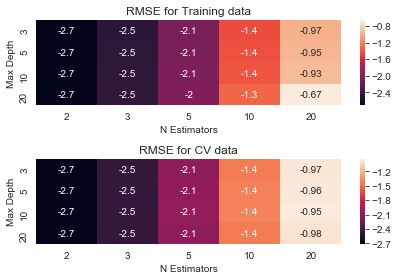

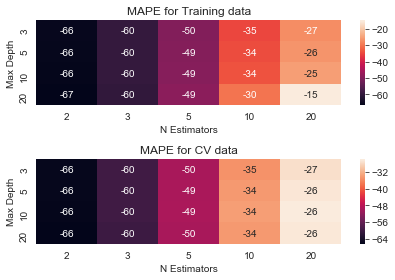

In [53]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# hyperparams the model
parameter = {'n_estimators':[2, 3, 5, 10, 20], 'max_depth':[3, 5, 10, 20]}
mape_loss = make_scorer(mape_fn, greater_is_better=False)
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAPE': mape_loss}
hype_xgboost(x_train,y_train,parameter,scoring,['RMSE','MAPE'])

[10:30:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.2283071695461987
MAPE :  32.08287519588911


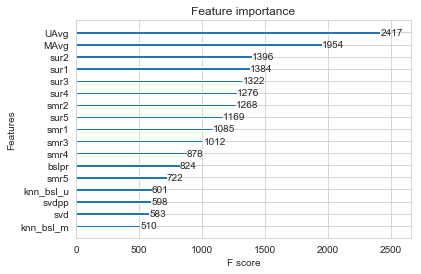

In [54]:
# With best rmse: n_estimator=20, max_depth=10
# With best mape, n_estimator=20, max_depth=20

first_xgb, train_results, test_results = train_xgboost(n_est=20, max_dep=10, xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results

xgboost.plot_importance(first_xgb)
plt.show()

<h3> 4.4.8 XgBoost with Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

Instance create XGBClassifier
Fitting GridSearchCV
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.688, test=-65.538), RMSE=(train=-2.726, test=-2.721), total=   1.0s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.712, test=-65.499), RMSE=(train=-2.724, test=-2.725), total=   1.1s
[CV] max_depth=3, n_estimators=2 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  max_depth=3, n_estimators=2, MAPE=(train=-65.552, test=-65.915), RMSE=(train=-2.725, test=-2.729), total=   1.0s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.884, test=-59.759), RMSE=(train=-2.498, test=-2.494), total=   1.3s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.889, test=-59.763), RMSE=(train=-2.497, test=-2.498), total=   1.4s
[CV] max_depth=3, n_estimators=3 .....................................
[CV]  max_depth=3, n_estimators=3, MAPE=(train=-59.808, test=-60.062), RMSE=(train=-2.498, test=-2.501), total=   1.2s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49.960, test=-49.878), RMSE=(train=-2.121, test=-2.117), total=   1.8s
[CV] max_depth=3, n_estimators=5 .....................................
[CV]  max_depth=3, n_estimators=5, MAPE=(train=-49

[CV]  max_depth=20, n_estimators=2, MAPE=(train=-65.689, test=-65.539), RMSE=(train=-2.726, test=-2.721), total=   2.0s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-65.714, test=-65.500), RMSE=(train=-2.724, test=-2.725), total=   2.5s
[CV] max_depth=20, n_estimators=2 ....................................
[CV]  max_depth=20, n_estimators=2, MAPE=(train=-65.552, test=-65.916), RMSE=(train=-2.725, test=-2.729), total=   1.3s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.881, test=-59.760), RMSE=(train=-2.498, test=-2.494), total=   3.0s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(train=-59.883, test=-59.764), RMSE=(train=-2.496, test=-2.498), total=   3.6s
[CV] max_depth=20, n_estimators=3 ....................................
[CV]  max_depth=20, n_estimators=3, MAPE=(tra

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.5min finished


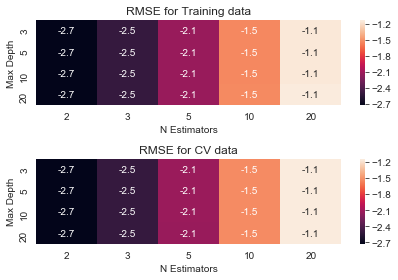

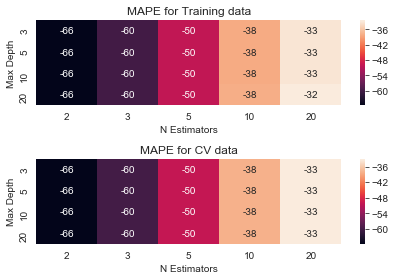

In [55]:
# prepare the train data....
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']

# hyperparams the model
parameter = {'n_estimators':[2, 3, 5, 10, 20], 'max_depth':[3, 5, 10, 20]}
mape_loss = make_scorer(mape_fn, greater_is_better=False)
scoring = {'RMSE': 'neg_root_mean_squared_error', 'MAPE': mape_loss}
hype_xgboost(x_train,y_train,parameter,scoring,['RMSE','MAPE'])

[10:39:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1795881217050705
MAPE :  32.765142561760044


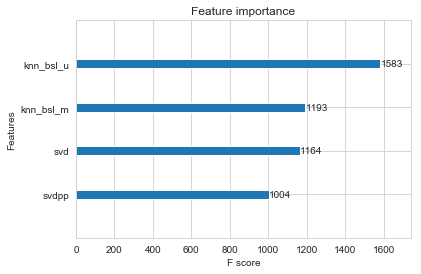

In [56]:
# With best rmse: n_estimator=20, max_depth=10
# With best mape, n_estimator=20, max_depth=20

first_xgb, train_results, test_results = train_xgboost(n_est=20, max_dep=10, xtrain=x_train, ytrain=y_train, xtest=x_test, ytest=y_test)
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgboost.plot_importance(first_xgb)
plt.show()

<h2> 4.5 Comparision between all models </h2>

In [57]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('results.csv')
models = pd.read_csv('results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd                1.081821397995262
knn_bsl_u         1.0818615549831905
knn_bsl_m          1.082024048595736
svdpp             1.0830215192566328
bsl_algo          1.0867846031800645
xgb_all_models    1.1795881217050705
xgb_knn_bsl       1.2049467453902432
xgb_final         1.2283071695461987
first_algo        1.2545561013662423
xgb_bsl           1.2545561013662423
Name: rmse, dtype: object

# Conclusion

1. Merging all data into one csv file (movie, user, rating, date)
2. Arrange the data according to date
3. Checking for missing values
4. Remove duplicates data (if present)
5. Basic Stats like<br>
    a. number of ratings<br>
    b. number of users<br>
    c. number of movies
6. Split data into train and test data (ratio 80:20)
7. Basic Stats (point number-5) for train and test
8. EDA on train data<br>
    a. Distribution of rating<br>
    b. Add new column(weekday) as per date and plot number of ratings per month<br>
    c. Analysis and describeon - rating given by user<br>
    d. Analysis and describeon - rating of movie given by user<br>
    e. Distribution and boxplot on 'number of ratings on rach day of the week'
9. Creating sparse matrix from dataframe
    a. Create sparse matrix as row(number of users) and column(number of movies) for train and test data<br>
    b. Calculate sparsity of a matrix for train and test data
10. finding Basic Stats (point number-5) for train data
11. PDF and CDF of average rating if users and movies (in train data)
12. Cold start problem with users and movies
13. Computing Similarity matrix
    a. Computing user-user similarity using cisine similarity<br>
    b. using dimension reduction (truncated SVD) for user vector and plot and observation on "gain of variance explained and latent factor)<br>
    c. compute user-user similarity from truncated SVD train data<br>
    d. compute movie-movie similarity
14. Storing movie's id and finding their top similar movie for each movie id's
15. From total train and test data, build sample data of 25K users and 3K movies
16. Finding Basic Stats (point number-5) from sampled train
17. Featurize sampled train and test data independently
18. Applying ML models (With plotting importance features also)

In [1]:
from prettytable import PrettyTable

In [3]:
x = PrettyTable()
x.field_names = ["Model", "Feature", "Test RMSE", "Test MAPE"]
x.add_row(['XGBoost','13 features',1.254,31.854])
x.add_row(['Surprise BaselineOnly','13 features',1.087,34.394])
x.add_row(['XGBoost','13 features + Baseline Predictor',1.254,31.854])
x.add_row(['Surprise KNNBaseline','13 features + Baseline Predictor [user sim only]',1.082,34.030])
x.add_row(['Surprise KNNBaseline','13 features + Baseline Predictor [movie sim only]',1.82,34.033])
x.add_row(['XGBoost','13 features + Baseline Predictor + KNNBaseline Predictor',1.205,32.282])
x.add_row(['SVD','13 features + Baseline Predictor + KNNBaseline Predictor',1.082,33.997])
x.add_row(['SVDpp','13 features + Baseline Predictor + KNNBaseline Predictor',1.083,33.958])
x.add_row(['XGBoost','13 features + Baseline Predictor + KNNBaseline Predictor + SVD + SVDpp',1.228,32.08])
x.add_row(['XGBoost','Surprise Baseline Predictor + KNNBasline Predictor + MF',1.179,32.765])
print(x)

+-----------------------+------------------------------------------------------------------------+-----------+-----------+
|         Model         |                                Feature                                 | Test RMSE | Test MAPE |
+-----------------------+------------------------------------------------------------------------+-----------+-----------+
|        XGBoost        |                              13 features                               |   1.254   |   31.854  |
| Surprise BaselineOnly |                              13 features                               |   1.087   |   34.394  |
|        XGBoost        |                    13 features + Baseline Predictor                    |   1.254   |   31.854  |
|  Surprise KNNBaseline |            13 features + Baseline Predictor [user sim only]            |   1.082   |   34.03   |
|  Surprise KNNBaseline |           13 features + Baseline Predictor [movie sim only]            |    1.82   |   34.033  |
|        XGBoost